## **PROYECTO INDIVUDIAL I**
Presentado por: Maria Isabel Arango M.
##
marango@ex-fin.com

# ANALISIS EXPLORATORIO DE DATOS (EDA)
#
Se realiza el análisis de datos con al información ya limpia:

In [2]:
#Librerias

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Cargo los datos de los archivos 
data_movies = pd.read_parquet('./Datasets/data_movies.parquet')
data_credits = pd.read_parquet('./Datasets/data_credits.parquet')

***Data_Movies***

In [4]:
data_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,production_countries_1_name,genres_1_id,genres_1_name,genres_2_id,genres_2_name,genres_3_id,genres_3_name,release_year,return,retorno_US
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,United States of America,16.0,Animation,16.0,Animation,16.0,Animation,1995,11.451801,343554033.0
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,United States of America,12.0,Adventure,12.0,Adventure,12.0,Adventure,1995,3.043035,197797249.0
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,United States of America,10749.0,Romance,10749.0,Romance,NaN,None,1995,0.000000,0.0
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,United States of America,35.0,Comedy,35.0,Comedy,35.0,Comedy,1995,4.090760,65452156.0
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,United States of America,35.0,Comedy,NaN,None,NaN,None,1995,0.000000,0.0


In [17]:
data_movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'belongs_to_collection_id',
       'belongs_to_collection_name', 'spoken_languages_1_iso',
       'spoken_languaje_1_name', 'production_companies_1_name',
       'production_companies_1_id', 'production_companies_2_name',
       'production_companies_2_id', 'production_countries_1_iso',
       'production_countries_1_name', 'genres_1_id', 'genres_1_name',
       'genres_2_id', 'genres_2_name', 'genres_3_id', 'genres_3_name',
       'release_year', 'return', 'retorno_US'],
      dtype='object')

In [6]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45363 entries, 0 to 45465
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       45363 non-null  int64  
 1   id                           45363 non-null  int64  
 2   original_language            45352 non-null  object 
 3   overview                     44422 non-null  object 
 4   popularity                   45363 non-null  float64
 5   release_date                 45363 non-null  object 
 6   revenue                      45363 non-null  float64
 7   runtime                      45117 non-null  float64
 8   status                       45283 non-null  object 
 9   tagline                      20394 non-null  object 
 10  title                        45363 non-null  object 
 11  vote_average                 45363 non-null  float64
 12  vote_count                   45363 non-null  float64
 13  belongs_to_collection

In [7]:
data_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,belongs_to_collection_id,production_companies_1_id,production_companies_2_id,genres_1_id,genres_2_id,genres_3_id,release_year,return,retorno_US
count,4.536300e+04,45363.000000,45363.000000,4.536300e+04,45117.000000,45363.000000,45363.000000,4483.000000,33570.000000,16996.000000,42979.000000,28433.000000,13967.000000,45363.000000,4.536300e+04,4.536300e+04
mean,4.233796e+06,108030.387452,2.926515,1.123331e+07,94.178181,5.624064,110.117453,183920.366496,10648.975573,17849.552306,937.249401,1231.923258,1213.416052,1991.879638,6.601133e+02,7.025125e+06
std,1.744222e+07,112175.538880,6.010299,6.439890e+07,38.345037,1.915402,491.810701,141557.830713,18147.900402,22454.601774,2924.931335,3327.321419,3302.267672,24.057134,7.470399e+04,5.172948e+07
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10.000000,1.000000,2.000000,12.000000,12.000000,12.000000,1874.000000,-9.999995e-01,-1.657101e+08
25%,0.000000e+00,26387.500000,0.388835,0.000000e+00,85.000000,5.000000,3.000000,86024.000000,516.000000,3127.000000,18.000000,18.000000,18.000000,1978.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,59857.000000,1.130302,0.000000e+00,95.000000,6.000000,10.000000,141448.000000,3964.000000,8791.500000,28.000000,28.000000,28.000000,2001.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,156556.500000,3.691946,0.000000e+00,107.000000,6.800000,34.000000,294076.500000,10330.000000,21207.000000,53.000000,37.000000,36.000000,2010.000000,0.000000e+00,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,96067.000000,96035.000000,10770.000000,10770.000000,10770.000000,2020.000000,1.239638e+07,2.550965e+09


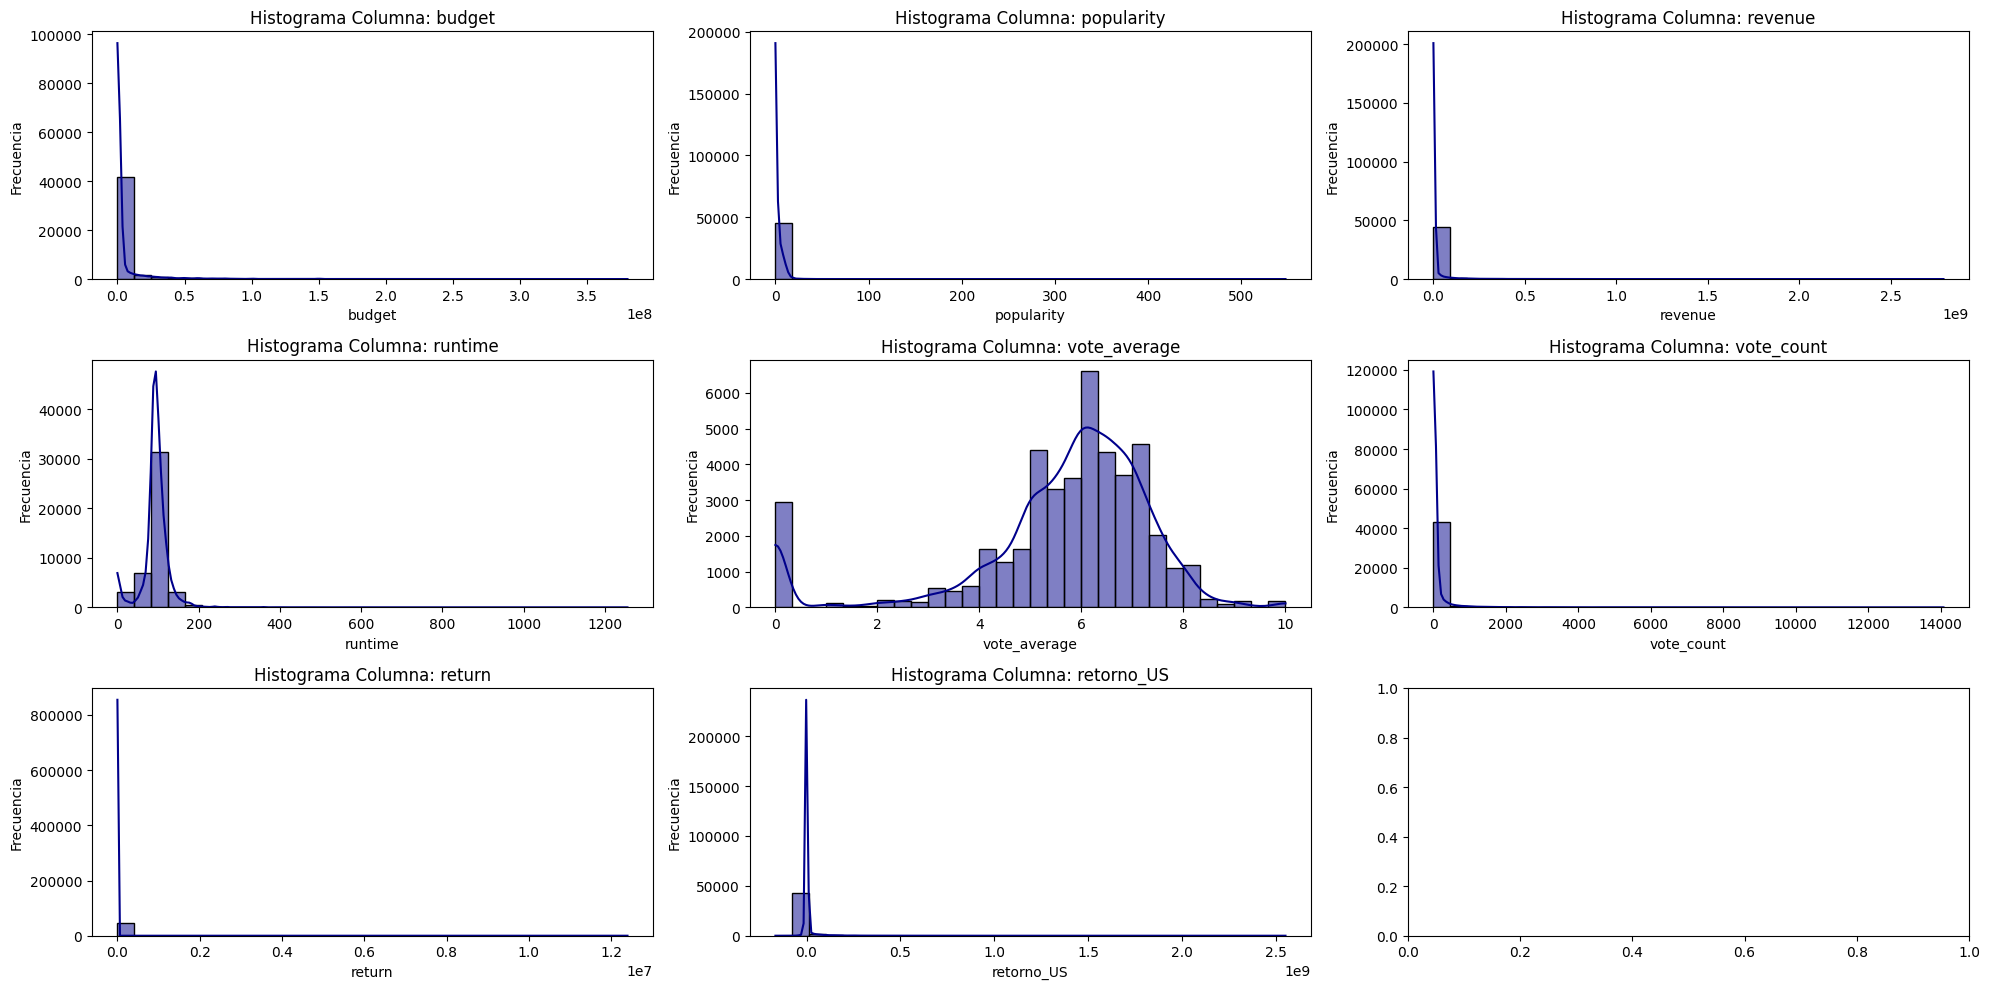

In [8]:
# Crear histogramas para variables numéricas

# Especifica las columnas que deseas graficar
columnas_a_graficar_1 = ['budget',
                       'popularity',
                       'revenue',
                       'runtime',
                       'vote_average',
                        'vote_count',
                        'return',
                        'retorno_US']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flatten()
# Iteraro la lista para crear los subgraficos
for ax, column in zip(axes, columnas_a_graficar_1):
    if column in data_movies.columns:
        sns.histplot(data_movies[column].dropna(), bins=30, kde=True, ax=ax, color='darkblue', edgecolor='black')
        ax.set_title(f'Histograma Columna: {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()

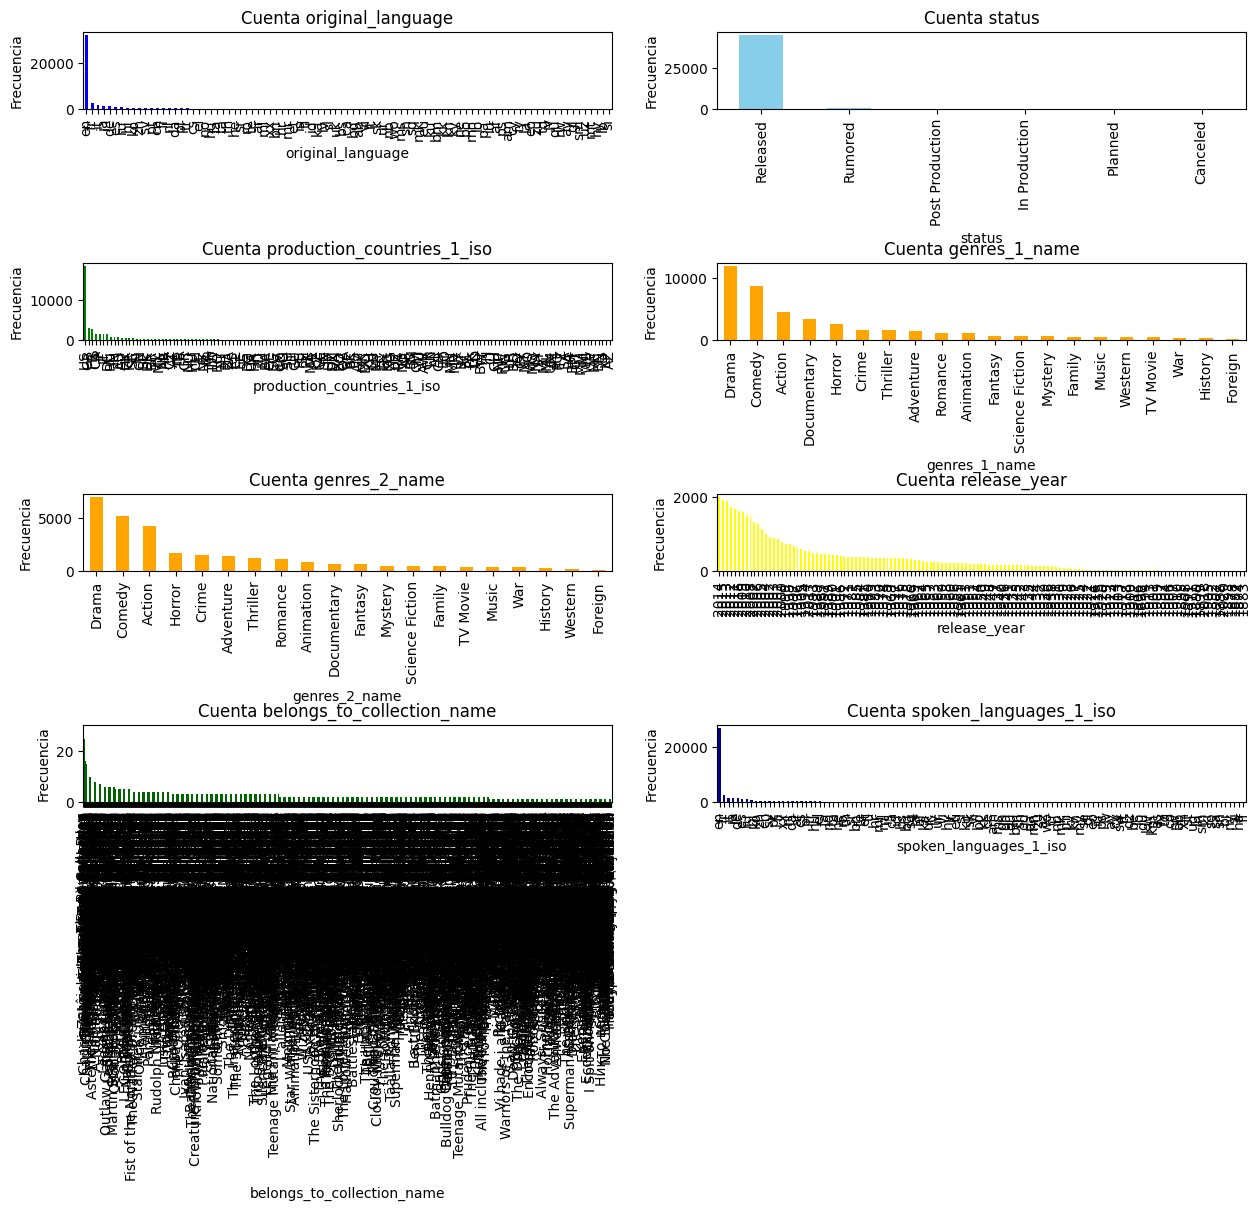

In [18]:
import matplotlib.pyplot as plt

# Lista de columnas y colores que voya a graficar
columnas_a_graficar2 = [
    ('original_language', 'blue'),
    ('status', 'skyblue'),
    ('production_countries_1_iso', 'green'),
    ('genres_1_name', 'orange'),
    ('genres_2_name', 'orange'),
    ('release_year', 'yellow'),
    ('belongs_to_collection_name', 'darkgreen'),
    ('spoken_languages_1_iso', 'darkblue'),
    ('Release_year' , 'red')
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Iteraro sobre cada columna y su correspondiente subgráfico
for ax, (columna, color) in zip(axes, columnas_a_graficar2):
    data_movies[columna].value_counts().plot(kind='bar', ax=ax, color=color)
    ax.set_title(f'Cuenta {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')

plt.subplots_adjust(hspace=2.0, wspace=0.2)  # Ajustar espacio entre subgráficos

plt.show()


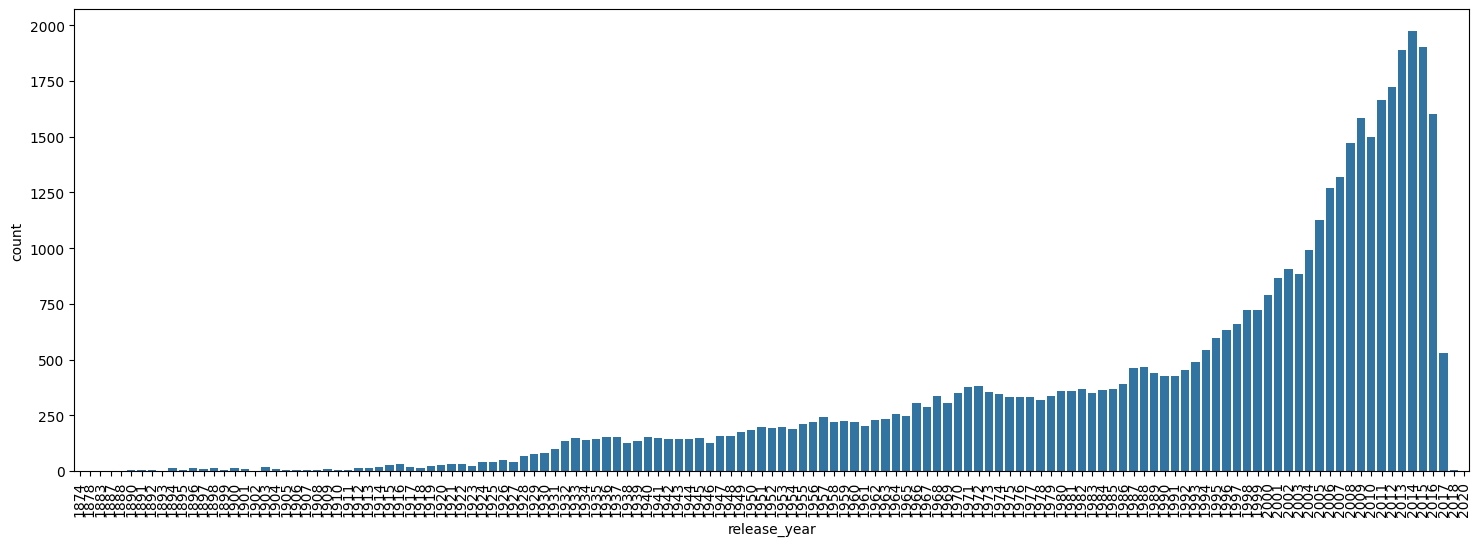

In [31]:
plt.figure(figsize=(18, 6))
sns.countplot(x=data_movies['release_year'])
plt.yticks()
plt.xticks(rotation=90)
plt.show()

In [37]:
print(f'El año menor en la data es: ',{data_movies['release_year'].min()})
print(f'El año mayor en la data es: ',{data_movies['release_year'].max()})


El año menor en la data es:  {np.int32(1874)}
El año mayor en la data es:  {np.int32(2020)}


In [10]:
# Correlación entre variables

data_numerico = data_movies[columnas_a_graficar_1]
data_numerico

,budget,popularity,revenue,runtime,vote_average,vote_count,return,retorno_US
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,11.451801,343554033.0
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,3.043035,197797249.0
2,0,11.712900,0.0,101.0,6.5,92.0,0.000000,0.0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,4.090760,65452156.0
4,0,8.387519,76578911.0,106.0,5.7,173.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
45460,0,5.683753,0.0,104.0,5.7,26.0,0.000000,0.0
45462,0,0.178241,0.0,360.0,9.0,3.0,0.000000,0.0
45463,0,0.903007,0.0,90.0,3.8,6.0,0.000000,0.0
45464,0,0.003503,0.0,87.0,0.0,0.0,0.000000,0.0


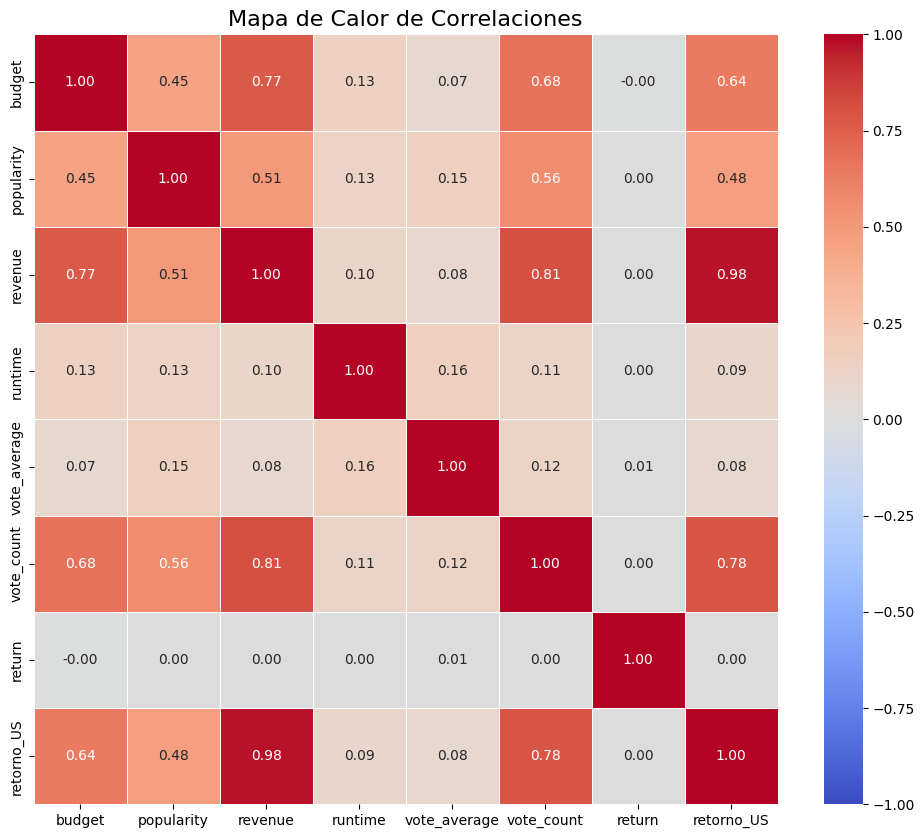

In [11]:
# Calcular la matriz de correlación
correlaciones = data_numerico.corr()

# Crear el gráfico de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Ajustar el título y mostrar el gráfico
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

In [12]:
data_numerico.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,return,retorno_US
count,4.536300e+04,45363.000000,4.536300e+04,45117.000000,45363.000000,45363.000000,4.536300e+04,4.536300e+04
mean,4.233796e+06,2.926515,1.123331e+07,94.178181,5.624064,110.117453,6.601133e+02,7.025125e+06
std,1.744222e+07,6.010299,6.439890e+07,38.345037,1.915402,491.810701,7.470399e+04,5.172948e+07
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-9.999995e-01,-1.657101e+08
25%,0.000000e+00,0.388835,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.130302,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,0.000000e+00
75%,0.000000e+00,3.691946,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2.550965e+09


In [13]:
# Detección de OutLiers

def detectar_outliers(df):
    outliers = {}
    for columna in df.columns:
        if pd.api.types.is_numeric_dtype(df[columna]):
            Q1 = df[columna].quantile(0.25)
            Q2 = df[columna].quantile(0.50)
            Q3 = df[columna].quantile(0.75)
            IQR = Q3 - Q1
            
            limite_inferior = Q1 - 3 * IQR
            limite_superior = Q3 + 3 * IQR
            Media = Q2

            outliers[columna] = {
                'limite_inferior': limite_inferior,
                'limite_superior': limite_superior,
                'Media': Media,
                'outliers': df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
            }
    return outliers

# Detectar outliers en el DataFrame
outliers = detectar_outliers(data_numerico)

# Mostrar resultados
for columna, datos in outliers.items():
    print(f"Columna: {columna}")
    print(f"Límite Inferior: {datos['limite_inferior']}")
    print(f"Límite Superior: {datos['limite_superior']}")
    print(f"Media: {datos['Media']}")
    print(f"Número de Outliers: {datos['outliers'].shape[0]}")
    print()


Columna: budget
Límite Inferior: 0.0
Límite Superior: 0.0
Media: 0.0
Número de Outliers: 8885

Columna: popularity
Límite Inferior: -9.520497999999998
Límite Superior: 13.601278999999998
Media: 1.130302
Número de Outliers: 1053

Columna: revenue
Límite Inferior: 0.0
Límite Superior: 0.0
Media: 0.0
Número de Outliers: 7405

Columna: runtime
Límite Inferior: 19.0
Límite Superior: 173.0
Media: 95.0
Número de Outliers: 3220

Columna: vote_average
Límite Inferior: -0.39999999999999947
Límite Superior: 12.2
Media: 6.0
Número de Outliers: 0

Columna: vote_count
Límite Inferior: -90.0
Límite Superior: 127.0
Media: 10.0
Número de Outliers: 5234

Columna: return
Límite Inferior: 0.0
Límite Superior: 0.0
Media: 0.0
Número de Outliers: 5361

Columna: retorno_US
Límite Inferior: 0.0
Límite Superior: 0.0
Media: 0.0
Número de Outliers: 5361



***Data_Credits***

In [14]:
data_credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45439 entries, 0 to 45475
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            45439 non-null  int64 
 1   cast_name     45439 non-null  object
 2   cast_name_2   45439 non-null  object
 3   cast_name_3   45439 non-null  object
 4   cast_name_4   45439 non-null  object
 5   cast_name_5   45439 non-null  object
 6   cast_name_6   45439 non-null  object
 7   cast_name_7   45439 non-null  object
 8   cast_name_8   45439 non-null  object
 9   cast_name_9   45439 non-null  object
 10  cast_name_10  45439 non-null  object
 11  director      45439 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.5+ MB


In [15]:
data_credits.head()

,id,cast_name,cast_name_2,cast_name_3,cast_name_4,cast_name_5,cast_name_6,cast_name_7,cast_name_8,cast_name_9,cast_name_10,director
0,862,tom hanks,tim allen,don rickles,jim varney,wallace shawn,john ratzenberger,annie potts,john morris,erik von detten,laurie metcalf,john lasseter
1,8844,robin williams,jonathan hyde,kirsten dunst,bradley pierce,bonnie hunt,bebe neuwirth,david alan grier,patricia clarkson,adam hann-byrd,laura bell bundy,larry j. franco
2,15602,walter matthau,jack lemmon,ann-margret,sophia loren,daryl hannah,burgess meredith,kevin pollak,none,none,none,howard deutch
3,31357,whitney houston,angela bassett,loretta devine,lela rochon,gregory hines,dennis haysbert,michael beach,mykelti williamson,lamont johnson,wesley snipes,forest whitaker
4,11862,steve martin,diane keaton,martin short,kimberly williams-paisley,george newbern,kieran culkin,bd wong,peter michael goetz,kate mcgregor-stewart,jane adams,alan silvestri


In [16]:
def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=15)
    plt.show()

Columnas_actores =['cast_name',
                      'cast_name_2',
                      'cast_name_3',
                      'cast_name_4',
                      'cast_name_5',
                      'cast_name_6',
                      'cast_name_7',
                      'cast_name_8',
                      'cast_name_9',
                      'cast_name_10']

# Concatenar nombres de las columnas de interés en una sola cadena de texto

def concatenar_columnas(df, columnas):
    texto_completo = ''
    for columna in columnas:
        if columna in df.columns:
            texto_completo += ' '.join(df[columna].dropna()) + ' '
    return texto_completo

# Verificar que las columnas existen en el DataFrame
print(data_credits.columns)

# Concatenar los nombres de los actores
texto_actores = concatenar_columnas(data_credits,columnas_actores)

# Generar nube de palabras para los actores
generar_nube_palabras(texto_actores, 'Nube de Palabras - Actores')


Index(['id', 'cast_name', 'cast_name_2', 'cast_name_3', 'cast_name_4',
       'cast_name_5', 'cast_name_6', 'cast_name_7', 'cast_name_8',
       'cast_name_9', 'cast_name_10', 'director'],
      dtype='object')


NameError: name 'columnas_actores' is not defined

In [ ]:
df_directores = data_credits['director']
df_directores = df_directores.dropna()
df_directores = pd.DataFrame(df_directores)

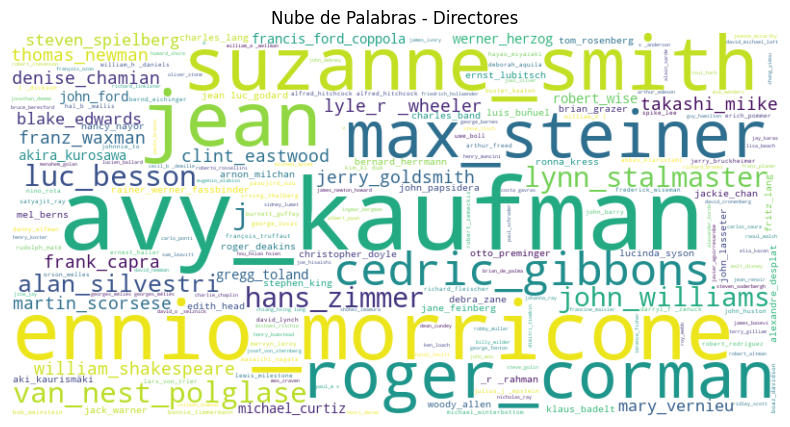

In [ ]:

# Función para concatenar los nombres de los directores
def concatena(df, lista_columnas):
    texto = ''
    for valor in df[lista_columnas].dropna():
        valor = valor.strip()
        valor = valor.replace(' ', '_')
        valor = valor.replace('none',' ')
        texto += valor + ' '
    return texto

# Función para generar la nube de palabras
def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

texto_directores = concatena(df_directores, 'director')
generar_nube_palabras(texto_directores, 'Nube de Palabras - Directores')

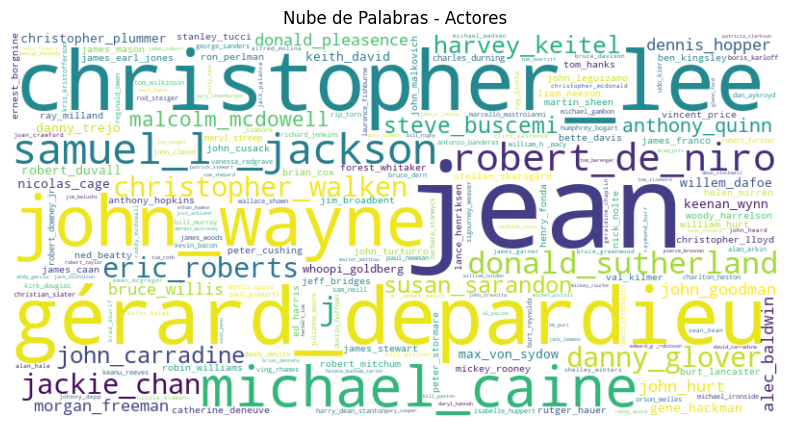

In [ ]:
df_actores = data_credits.drop('director',axis=1)

columnas_actores =['cast_name',
                    'cast_name_2','cast_name_3','cast_name_4','cast_name_5','cast_name_6','cast_name_7','cast_name_8','cast_name_9','cast_name_10']

# Función para concatenar los nombres de varias columnas
def concatena_varios(df, lista_columnas):
    texto = ''
    for col in lista_columnas:
        if col in df.columns:
            for valor in df[col]:
                valor = valor.strip()
                valor = valor.replace(' ', '_')
                valor = valor.replace('none', ' ')
                texto += valor + ' '
    return texto

texto_actores = concatena_varios(df_actores, columnas_actores)

generar_nube_palabras(texto_actores, 'Nube de Palabras - Actores')